In [5]:
""" 2 dim switching input 
    with identical Win
""" 


import torch
import matplotlib.pyplot as plt
import ESN
import time
import numpy as np
torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)
# Parameters
Two,Ttrain = 2000,1000000
N = 100
C = 0.9
rho = 0
dim = 2
idWin = True
actf= "identity"


N_d = int(N * dim)
maxtau = int(N_d * 2)
taus = np.arange(1,maxtau)



torch.manual_seed(0)



#u_asym = torch.rand(1, Two + Ttrain)

x = torch.normal(0,1/3,(1,Two+Ttrain),device="cuda:0")

y = torch.rand((1,Two+Ttrain))*2-1

zero = torch.zeros((1,Two+Ttrain))

u_1_zero =torch.vstack((x,zero))
u_1 = torch.tensor([[ u_1_zero[int((t+1)%2),t] for t in range(Two+Ttrain)]])
u_2_zero =torch.vstack((y,zero))
u_2 = torch.tensor([[ u_2_zero[int(t%2),t] for t in range(Two+Ttrain)]])

u_asym=torch.vstack((u_1,u_2))

esn = ESN.ESN_mult(N_d, uC=C, dim=dim,rseed=0,idWin=idWin)


print("stat running")
st = time.time()
Xwo = esn.run_washout(u_asym, Two, actf=actf,bias=False)
print("runtime :",time.time()-st)

st = time.time()
#
raw,lin,rev,sur = ESN.MC_cSVD_asym(u_asym, Xwo, maxtau,ret_all=True)
#raw_tilde,lin_tilde,rev_tilde,sur_tilde = ESN.MC_cSVD_asym(u_tilde, Xwo, maxtau,ret_all=True)


mfs=rev
#mfs_tilde=rev_tilde

print("calc time :",time.time()-st)


stat running
runtime : 123.15837931632996
calc time : 2.0918359756469727


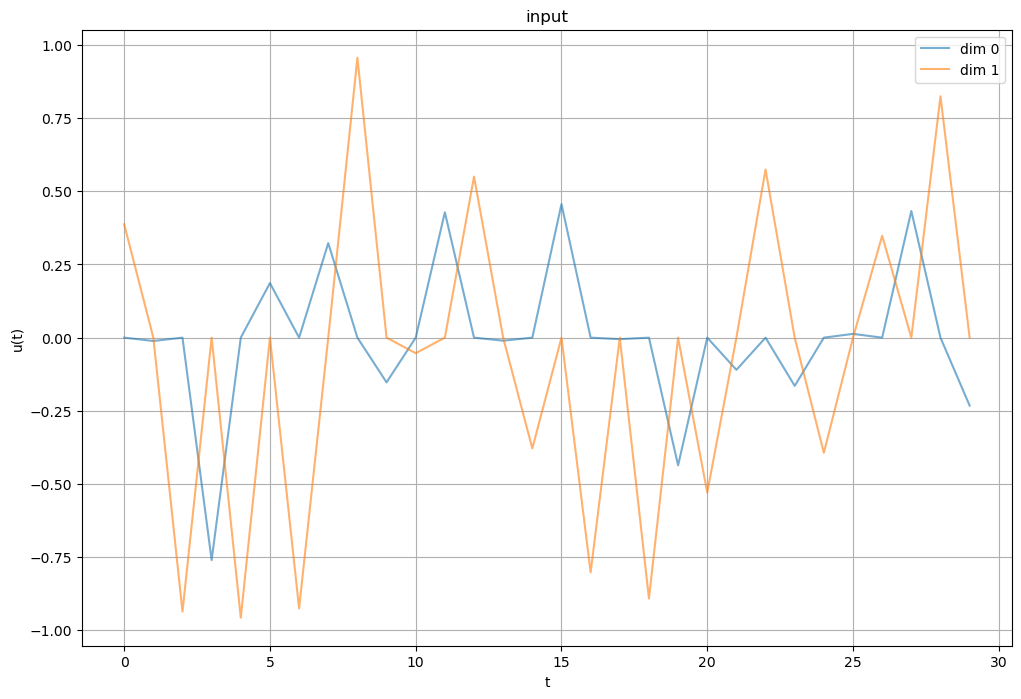

In [6]:
fig,ax = plt.subplots(figsize=(12,8))

maxT=30
x_ = np.arange(Two+Ttrain)

for d in range(dim):
    plt.plot(x_[:maxT],u_asym[d][:maxT].cpu().numpy(),alpha=0.6,label="dim "+str(d))

    
#plt.ylim(-0.1,1.1)
plt.xlabel("t")
plt.ylabel(r'u(t)')
plt.title(r"input")
#
plt.legend()
plt.grid(True)

In [7]:

fn="2d_switching_idwin"
torch.save(u_asym,f"./experiments/inputs/{fn}_i.pt")
torch.save(Xwo,f"./experiments/datamatrices/{fn}_lin_d.pt")


In [8]:

totMC = torch.sum(mfs).cpu().numpy()
#totMC_tilde = torch.sum(mfs_tilde).cpu().numpy()
#print("totMC_tilde : ",totMC_tilde)
print(f"totMC:{totMC}\nsurrogate value: {sur.cpu().numpy()}")



totMC:199.99128073028956
surrogate value: [0.00020061 0.00019912]


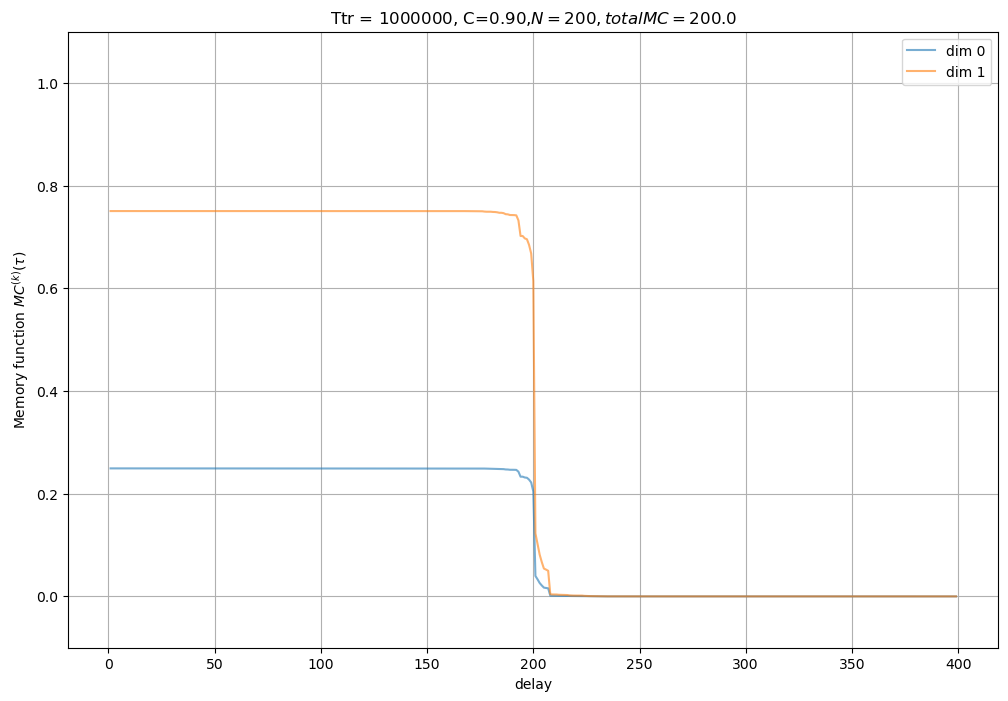

In [9]:
fig,ax = plt.subplots(figsize=(12,8))
for d in range(dim):
    plt.plot(taus,mfs[d].cpu().numpy(),alpha=0.6,label="dim "+str(d))
#    plt.plot(taus,raw[d].cpu().numpy(),alpha=0.6,label="dim "+str(d)+" raw")
    
    #plt.plot(taus,mfs_tilde[d].cpu().numpy(),alpha=0.6,label= "dim "+str(d)+" (normalized)")
    
plt.ylim(-0.1,1.1)
plt.xlabel("delay")
plt.ylabel(r'Memory function $MC^{(k)}(\tau)$')
plt.title(r'Ttr = %d, C=%.2f,$N=%d, totalMC=%.1f$'%(Ttrain,C,N_d,totMC))
#
plt.legend()
plt.grid(True)